In [58]:
import requests
import pandas as pd
import os

In [59]:
path = os.path.join(
    '..',
    'raw_data',
    'communes'
)

In [60]:
list_of_files = os.listdir(path)
list_of_files

['communes-plus-20140630.csv']

In [61]:
df = pd.read_csv(
    os.path.join(
        path,
        list_of_files[0]
    )
)

In [62]:
df.head()

,insee,nom,wikipedia,surf_m2,lat_centro,lon_centro,statut,x_chf_lieu,y_chf_lieu,z_moyen,population,code_cant,code_arr,code_dept,nom_dept,code_reg,nom_region
0,02114,Brasles,fr:Brasles,7453763.0,3.424210,49.057116,Commune simple,7312.0,68833.0,131.0,1.3,8.0,1.0,02,AISNE,22.0,PICARDIE
1,02292,Étampes-sur-Marne,fr:Étampes-sur-Marne,2207607.0,3.418950,49.031578,Commune simple,7306.0,68816.0,110.0,1.2,8.0,1.0,02,AISNE,22.0,PICARDIE
2,02120,Brenelle,fr:Brenelle,4352642.0,3.544405,49.368235,Commune simple,7394.0,69186.0,133.0,0.2,4.0,4.0,02,AISNE,22.0,PICARDIE
3,02064,Belleu,fr:Belleu,4537814.0,3.340256,49.357059,Commune simple,7243.0,69177.0,105.0,3.9,41.0,4.0,02,AISNE,22.0,PICARDIE
4,05180,Les Vigneaux,fr:Les Vigneaux,16155360.0,6.537109,44.821554,Commune simple,9797.0,64201.0,1498.0,0.5,2.0,1.0,05,HAUTES-ALPES,93.0,PROVENCE-ALPES-COTE D'AZUR


In [63]:
df['statut'].unique()

array(['Commune simple', 'Sous-préfecture', 'Chef-lieu canton',
       'Préfecture', 'Préfecture de régi', "Capitale d'état", nan],
      dtype=object)

In [64]:
code_insees = set(df['insee'])

path_to_epci = os.path.join(
    '..',
    'clean_data',
    'epci'
)

communes_manquantes = {}

for file in os.listdir(path_to_epci):
    df_epci = pd.read_csv(os.path.join(path_to_epci, file))
    communes_manquantes[file] = df_epci[-df_epci['codgeo'].isin(code_insees)]
    
    
[len(communes_manquantes[c]) for c in communes_manquantes]

[5, 5, 5, 5, 5]

In [65]:
from IPython.display import display

for f in communes_manquantes:
    print(f)
    display(communes_manquantes[f])

2018.csv


,code_epci,libelle_epci,nature_epci,nb_communes,codgeo,libgeo,code_departement,code_region
1423,200033025,CA de Bar-le-Duc - Sud Meuse,CA,33,55138,Culey,55,44
7687,200046977,Métropole de LYON,ME,59,69123,Lyon,69,84
7868,200054781,Métropole du Grand Paris,ME,131,75056,Paris,75,11
8041,200054807,Métropole d'Aix-Marseille-Provence,ME,92,13055,Marseille,13,93
17999,200069730,CC des Quatre Rivières,CC,53,76601,Saint-Lucien,76,28


2016.csv


,codgeo,libgeo,code_epci,libelle_epci,code_departement,code_region,nature_epci,nb_communes
4684,13055,Marseille,200054807,Métropole d'Aix-Marseille-Provence,13,93,ME,92
5308,14472,L'Oudon,241400795,CC des Trois Rivières,14,28,CC,14
21500,55138,Culey,200033025,CA de Bar-Le-Duc - Sud Meuse,55,44,CA,33
28246,69123,Lyon,200046977,Métropole de LYON,69,84,ME,59
30353,75056,Paris,200054781,Métropole du Grand Paris,75,11,ME,131


2019.csv


,code_epci,libelle_epci,nature_epci,nb_communes,codgeo,libgeo,code_departement,code_region
1406,200033025,CA de Bar-le-Duc - Sud Meuse,CA,33,55138,Culey,55,44
7600,200046977,Métropole de Lyon,ME,59,69123,Lyon,69,84
7780,200054781,Métropole du Grand Paris,ME,131,75056,Paris,75,11
7953,200054807,Métropole d'Aix-Marseille-Provence,ME,92,13055,Marseille,13,93
17793,200069730,CC des Quatre Rivières,CC,53,76601,Saint-Lucien,76,28


2020.csv


,code_epci,libelle_epci,nature_epci,nb_communes,codgeo,libgeo,code_departement,code_region
1381,200033025,CA de Bar-le-Duc - Sud Meuse,CA,33,55138,Culey,55,44
7523,200046977,Métropole de Lyon,ME,59,69123,Lyon,69,84
7701,200054781,Métropole du Grand Paris,ME,131,75056,Paris,75,11
7874,200054807,Métropole d'Aix-Marseille-Provence,ME,92,13055,Marseille,13,93
17673,200069730,CC des Quatre Rivières,CC,53,76601,Saint-Lucien,76,28


2017.csv


,code_epci,libelle_epci,nature_epci,nb_communes,codgeo,libgeo,code_departement,code_region
1425,200033025,CA de Bar-le-Duc - Sud Meuse,CA,33,55138,Culey,55,44
7665,200046977,Métropole de LYON,ME,59,69123,Lyon,69,84
7846,200054781,Métropole du Grand Paris,ME,131,75056,Paris,75,11
8019,200054807,Métropole d'Aix-Marseille-Provence,ME,92,13055,Marseille,13,93
18017,200069730,CC des Quatre Rivières,CC,54,76601,Saint-Lucien,76,28


In [66]:
df[df['nom'] == 'Saint-Lucien']

,insee,nom,wikipedia,surf_m2,lat_centro,lon_centro,statut,x_chf_lieu,y_chf_lieu,z_moyen,population,code_cant,code_arr,code_dept,nom_dept,code_reg,nom_region
30283,28349,Saint-Lucien,fr:Saint-Lucien (Eure-et-Loir),8457521.0,1.621935,48.639615,Commune simple,5986.0,68395.0,136.0,0.2,19.0,3.0,28,EURE-ET-LOIR,24.0,CENTRE


In [67]:
df[df['nom'].apply(lambda x: 'Culey' in x)]

,insee,nom,wikipedia,surf_m2,lat_centro,lon_centro,statut,x_chf_lieu,y_chf_lieu,z_moyen,population,code_cant,code_arr,code_dept,nom_dept,code_reg,nom_region
18596,14211,Culey-le-Patry,fr:Culey-le-Patry,7734064.0,-0.531104,48.956868,Commune simple,4414.0,68781.0,142.0,0.3,31.0,2.0,14,CALVADOS,25.0,BASSE-NORMANDIE
33711,55298,Loisey-Culey,fr:Loisey-Culey,24497611.0,5.283509,48.767331,Commune simple,8679.0,68541.0,307.0,0.5,11.0,1.0,55,MEUSE,41.0,LORRAINE


In [68]:
df[df['nom'].apply(lambda x: 'Paris' in x)]

,insee,nom,wikipedia,surf_m2,lat_centro,lon_centro,statut,x_chf_lieu,y_chf_lieu,z_moyen,population,code_cant,code_arr,code_dept,nom_dept,code_reg,nom_region
14370,81202,Parisot,fr:Parisot (Tarn),28719138.0,1.836666,43.804774,Commune simple,6059.0,63006.0,195.0,0.8,18.0,1.0,81,TARN,73.0,MIDI-PYRENEES
15381,82137,Parisot,fr:Parisot (Tarn-et-Garonne),28224410.0,1.866213,44.261992,Commune simple,6087.0,63524.0,351.0,0.5,20.0,2.0,82,TARN-ET-GARONNE,73.0,MIDI-PYRENEES
21663,95241,Fontenay-en-Parisis,fr:Fontenay-en-Parisis,11030680.0,2.445744,49.049923,Commune simple,6598.0,68837.0,112.0,1.9,15.0,2.0,95,VAL-D'OISE,11.0,ILE-DE-FRANCE
22022,95176,Cormeilles-en-Parisis,fr:Cormeilles-en-Parisis,8443356.0,2.199197,48.968657,Chef-lieu canton,6414.0,68750.0,88.0,22.6,5.0,1.0,95,VAL-D'OISE,11.0,ILE-DE-FRANCE
30291,62826,Le Touquet-Paris-Plage,fr:Le Touquet-Paris-Plage,15420436.0,1.599052,50.509091,Commune simple,5995.0,70482.0,12.0,4.8,37.0,4.0,62,PAS-DE-CALAIS,31.0,NORD-PAS-DE-CALAIS
32321,71343,Paris-l'Hôpital,fr:Paris-l'Hôpital,2758933.0,4.639472,46.912419,Commune simple,8244.0,66473.0,316.0,0.2,13.0,1.0,71,SAONE-ET-LOIRE,26.0,BOURGOGNE
36721,38485,Seyssinet-Pariset,fr:Seyssinet-Pariset,10784702.0,5.669229,45.172830,Commune simple,9119.0,64571.0,585.0,12.2,56.0,1.0,38,ISERE,82.0,RHONE-ALPES


In [69]:
df[df['nom'].apply(lambda x: 'Marseille' in x)]

,insee,nom,wikipedia,surf_m2,lat_centro,lon_centro,statut,x_chf_lieu,y_chf_lieu,z_moyen,population,code_cant,code_arr,code_dept,nom_dept,code_reg,nom_region
173,13204,Marseille 4e Arrondissement,fr:4e arrondissement de Marseille,2880391.0,5.401043,43.306659,Commune simple,8947.0,62472.0,58.0,47.1,99.0,3.0,13,BOUCHES-DU-RHONE,93.0,PROVENCE-ALPES-COTE D'AZUR
174,13203,Marseille 3e Arrondissement,fr:3e arrondissement de Marseille,2540420.0,5.379359,43.311784,Commune simple,8919.0,62472.0,25.0,45.4,99.0,3.0,13,BOUCHES-DU-RHONE,93.0,PROVENCE-ALPES-COTE D'AZUR
175,13205,Marseille 5e Arrondissement,fr:5e arrondissement de Marseille,2185746.0,5.398170,43.292388,Commune simple,8947.0,62472.0,35.0,44.5,99.0,3.0,13,BOUCHES-DU-RHONE,93.0,PROVENCE-ALPES-COTE D'AZUR
5374,60387,Marseille-en-Beauvaisis,fr:Marseille-en-Beauvaisis,8160272.0,1.957817,49.575394,Chef-lieu canton,6244.0,69423.0,152.0,1.2,22.0,1.0,60,OISE,22.0,PICARDIE
8634,13201,Marseille 1er Arrondissement,fr:1er arrondissement de Marseille,1778296.0,5.382715,43.299987,Préfecture de régi,8934.0,62473.0,29.0,40.9,99.0,3.0,13,BOUCHES-DU-RHONE,93.0,PROVENCE-ALPES-COTE D'AZUR
8672,13202,Marseille 2e Arrondissement,fr:2e arrondissement de Marseille,4987243.0,5.359465,43.316143,Commune simple,8923.0,62470.0,6.0,25.7,99.0,3.0,13,BOUCHES-DU-RHONE,93.0,PROVENCE-ALPES-COTE D'AZUR
8719,13213,Marseille 13e Arrondissement,fr:13e arrondissement de Marseille,28007179.0,5.433841,43.349998,Commune simple,8930.0,62524.0,648.0,89.3,99.0,3.0,13,BOUCHES-DU-RHONE,93.0,PROVENCE-ALPES-COTE D'AZUR
8720,13215,Marseille 15e Arrondissement,fr:15e arrondissement de Marseille,16850956.0,5.362977,43.359131,Commune simple,8918.0,62511.0,124.0,77.7,99.0,3.0,13,BOUCHES-DU-RHONE,93.0,PROVENCE-ALPES-COTE D'AZUR
8771,13207,Marseille 7e Arrondissement,fr:7e arrondissement de Marseille,5768160.0,5.342766,43.280436,Commune simple,8934.0,62473.0,35.0,35.9,99.0,3.0,13,BOUCHES-DU-RHONE,93.0,PROVENCE-ALPES-COTE D'AZUR
8780,13210,Marseille 10e Arrondissement,fr:10e arrondissement de Marseille,10782940.0,5.427820,43.275125,Commune simple,8962.0,62439.0,100.0,51.2,99.0,3.0,13,BOUCHES-DU-RHONE,93.0,PROVENCE-ALPES-COTE D'AZUR


In [70]:
df[df['nom'].apply(lambda x: 'Lyon' in x)]

,insee,nom,wikipedia,surf_m2,lat_centro,lon_centro,statut,x_chf_lieu,y_chf_lieu,z_moyen,population,code_cant,code_arr,code_dept,nom_dept,code_reg,nom_region
1735,69382,Lyon 2e Arrondissement,fr:2e arrondissement de Lyon,3389136.0,4.825609,45.748283,Commune simple,8420.0,65187.0,166.0,29.8,99.0,1.0,69,RHONE,82.0,RHONE-ALPES
1736,69381,Lyon 1er Arrondissement,fr:1er arrondissement de Lyon,1520249.0,4.828552,45.770050,Préfecture de régi,8426.0,65203.0,197.0,28.1,99.0,1.0,69,RHONE,82.0,RHONE-ALPES
1737,69385,Lyon 5e Arrondissement,fr:5e arrondissement de Lyon,6186319.0,4.803034,45.756260,Commune simple,8400.0,65191.0,255.0,47.0,99.0,1.0,69,RHONE,82.0,RHONE-ALPES
1745,69388,Lyon 8e Arrondissement,fr:8e arrondissement de Lyon,6677829.0,4.869282,45.733915,Commune simple,8456.0,65167.0,175.0,76.3,99.0,1.0,69,RHONE,82.0,RHONE-ALPES
2362,69383,Lyon 3e Arrondissement,fr:3e arrondissement de Lyon,6379429.0,4.869395,45.753334,Commune simple,8437.0,65195.0,174.0,90.4,99.0,1.0,69,RHONE,82.0,RHONE-ALPES
2845,69389,Lyon 9e Arrondissement,fr:9e arrondissement de Lyon,7533719.0,4.808772,45.782626,Commune simple,8403.0,65209.0,202.0,47.1,99.0,1.0,69,RHONE,82.0,RHONE-ALPES
7238,42059,Chazelles-sur-Lyon,fr:Chazelles-sur-Lyon,21075478.0,4.374057,45.629042,Chef-lieu canton,8084.0,65052.0,541.0,5.1,6.0,1.0,42,LOIRE,82.0,RHONE-ALPES
7252,69386,Lyon 6e Arrondissement,fr:6e arrondissement de Lyon,3778919.0,4.851884,45.773132,Commune simple,8437.0,65204.0,168.0,49.6,99.0,1.0,69,RHONE,82.0,RHONE-ALPES
7255,69387,Lyon 7e Arrondissement,fr:7e arrondissement de Lyon,9599113.0,4.837407,45.733416,Commune simple,8431.0,65179.0,166.0,69.2,99.0,1.0,69,RHONE,82.0,RHONE-ALPES
11894,03080,Cognat-Lyonne,fr:Cognat-Lyonne,12577907.0,3.298051,46.107615,Commune simple,7239.0,65565.0,334.0,0.7,10.0,3.0,03,ALLIER,83.0,AUVERGNE


In [71]:
df[df['nom'].apply(lambda x: 'Arrondissement' in x)]

,insee,nom,wikipedia,surf_m2,lat_centro,lon_centro,statut,x_chf_lieu,y_chf_lieu,z_moyen,population,code_cant,code_arr,code_dept,nom_dept,code_reg,nom_region
173,13204,Marseille 4e Arrondissement,fr:4e arrondissement de Marseille,2880391.0,5.401043,43.306659,Commune simple,8947.0,62472.0,58.0,47.1,99.0,3.0,13,BOUCHES-DU-RHONE,93.0,PROVENCE-ALPES-COTE D'AZUR
174,13203,Marseille 3e Arrondissement,fr:3e arrondissement de Marseille,2540420.0,5.379359,43.311784,Commune simple,8919.0,62472.0,25.0,45.4,99.0,3.0,13,BOUCHES-DU-RHONE,93.0,PROVENCE-ALPES-COTE D'AZUR
175,13205,Marseille 5e Arrondissement,fr:5e arrondissement de Marseille,2185746.0,5.398170,43.292388,Commune simple,8947.0,62472.0,35.0,44.5,99.0,3.0,13,BOUCHES-DU-RHONE,93.0,PROVENCE-ALPES-COTE D'AZUR
1735,69382,Lyon 2e Arrondissement,fr:2e arrondissement de Lyon,3389136.0,4.825609,45.748283,Commune simple,8420.0,65187.0,166.0,29.8,99.0,1.0,69,RHONE,82.0,RHONE-ALPES
1736,69381,Lyon 1er Arrondissement,fr:1er arrondissement de Lyon,1520249.0,4.828552,45.770050,Préfecture de régi,8426.0,65203.0,197.0,28.1,99.0,1.0,69,RHONE,82.0,RHONE-ALPES
1737,69385,Lyon 5e Arrondissement,fr:5e arrondissement de Lyon,6186319.0,4.803034,45.756260,Commune simple,8400.0,65191.0,255.0,47.0,99.0,1.0,69,RHONE,82.0,RHONE-ALPES
1745,69388,Lyon 8e Arrondissement,fr:8e arrondissement de Lyon,6677829.0,4.869282,45.733915,Commune simple,8456.0,65167.0,175.0,76.3,99.0,1.0,69,RHONE,82.0,RHONE-ALPES
2362,69383,Lyon 3e Arrondissement,fr:3e arrondissement de Lyon,6379429.0,4.869395,45.753334,Commune simple,8437.0,65195.0,174.0,90.4,99.0,1.0,69,RHONE,82.0,RHONE-ALPES
2845,69389,Lyon 9e Arrondissement,fr:9e arrondissement de Lyon,7533719.0,4.808772,45.782626,Commune simple,8403.0,65209.0,202.0,47.1,99.0,1.0,69,RHONE,82.0,RHONE-ALPES
7233,75115,15e Arrondissement,fr:15e arrondissement de Paris,8509736.0,2.292852,48.840083,Chef-lieu canton,6486.0,68603.0,40.0,236.5,29.0,1.0,75,PARIS,11.0,ILE-DE-FRANCE


In [72]:
# remplacement du code insee de Saint-Lucien dans la base des communes



In [76]:
code_insees = set(df['insee'])

communes_manquantes = {}

for file in os.listdir(path_to_epci):
    df_epci = pd.read_csv(os.path.join(path_to_epci, file))
    communes_manquantes[file] = df_epci[-df_epci['codgeo'].isin(code_insees)]
    
    
print([len(communes_manquantes[c]) for c in communes_manquantes])

for f in sorted(communes_manquantes.keys()):
    print(f)
    display(communes_manquantes[f][['codgeo', 'code_departement', 'libgeo']])

[5, 5, 5, 5, 5]
2016.csv


,codgeo,code_departement,libgeo
4684,13055,13,Marseille
5308,14472,14,L'Oudon
21500,55138,55,Culey
28246,69123,69,Lyon
30353,75056,75,Paris


2017.csv


,codgeo,code_departement,libgeo
1425,55138,55,Culey
7665,69123,69,Lyon
7846,75056,75,Paris
8019,13055,13,Marseille
18017,76601,76,Saint-Lucien


2018.csv


,codgeo,code_departement,libgeo
1423,55138,55,Culey
7687,69123,69,Lyon
7868,75056,75,Paris
8041,13055,13,Marseille
17999,76601,76,Saint-Lucien


2019.csv


,codgeo,code_departement,libgeo
1406,55138,55,Culey
7600,69123,69,Lyon
7780,75056,75,Paris
7953,13055,13,Marseille
17793,76601,76,Saint-Lucien


2020.csv


,codgeo,code_departement,libgeo
1381,55138,55,Culey
7523,69123,69,Lyon
7701,75056,75,Paris
7874,13055,13,Marseille
17673,76601,76,Saint-Lucien


### Problemes de communes manquantes

- Culey s'est séparé de Longey en 2014
- Saint-Lucien s'est séparé de Sigy en Bray en 2017
- L'Oudon a été fusionné en 2017 dans la commune Saint-Pierre-en-Auge

In [77]:
# solution pour Culey
df[df['nom'].apply(lambda x: 'Culey' in x)]

,insee,nom,wikipedia,surf_m2,lat_centro,lon_centro,statut,x_chf_lieu,y_chf_lieu,z_moyen,population,code_cant,code_arr,code_dept,nom_dept,code_reg,nom_region
18596,14211,Culey-le-Patry,fr:Culey-le-Patry,7734064.0,-0.531104,48.956868,Commune simple,4414.0,68781.0,142.0,0.3,31.0,2.0,14,CALVADOS,25.0,BASSE-NORMANDIE
33711,55298,Loisey-Culey,fr:Loisey-Culey,24497611.0,5.283509,48.767331,Commune simple,8679.0,68541.0,307.0,0.5,11.0,1.0,55,MEUSE,41.0,LORRAINE


In [90]:
# en 2018, Culey compte 138 habitants
# https://fr.wikipedia.org/wiki/Culey

# on va diviser la commune en deux 
# et prendre 100 personnes pour les mettre dans Culey
# et 200 personnes pour les mettre dans Loisey

df_loisey_culey = pd.concat([df[df['nom'] == 'Loisey-Culey']] * 2)

In [91]:
df_epci[df_epci['libgeo'] == 'Loisey']

,code_epci,libelle_epci,nature_epci,nb_communes,codgeo,libgeo,code_departement,code_region
1430,200033025,CA de Bar-le-Duc - Sud Meuse,CA,33,55298,Loisey,55,44


In [92]:
df_epci[df_epci['libgeo'] == 'Culey']

,code_epci,libelle_epci,nature_epci,nb_communes,codgeo,libgeo,code_departement,code_region
1425,200033025,CA de Bar-le-Duc - Sud Meuse,CA,33,55138,Culey,55,44


In [93]:
df_loisey_culey

,insee,nom,wikipedia,surf_m2,lat_centro,lon_centro,statut,x_chf_lieu,y_chf_lieu,z_moyen,population,code_cant,code_arr,code_dept,nom_dept,code_reg,nom_region
33711,55298,Loisey-Culey,fr:Loisey-Culey,24497611.0,5.283509,48.767331,Commune simple,8679.0,68541.0,307.0,0.5,11.0,1.0,55,MEUSE,41.0,LORRAINE
33711,55298,Loisey-Culey,fr:Loisey-Culey,24497611.0,5.283509,48.767331,Commune simple,8679.0,68541.0,307.0,0.5,11.0,1.0,55,MEUSE,41.0,LORRAINE


In [94]:
df_loisey_culey['insee'] = [55298, 55138]
df_loisey_culey['nom'] = ['Loisey', 'Culey']
df_loisey_culey['population'] = [0.4, 0.2]

df_loisey_culey

,insee,nom,wikipedia,surf_m2,lat_centro,lon_centro,statut,x_chf_lieu,y_chf_lieu,z_moyen,population,code_cant,code_arr,code_dept,nom_dept,code_reg,nom_region
33711,55298,Loisey,fr:Loisey-Culey,24497611.0,5.283509,48.767331,Commune simple,8679.0,68541.0,307.0,0.4,11.0,1.0,55,MEUSE,41.0,LORRAINE
33711,55138,Culey,fr:Loisey-Culey,24497611.0,5.283509,48.767331,Commune simple,8679.0,68541.0,307.0,0.2,11.0,1.0,55,MEUSE,41.0,LORRAINE


In [96]:
df = pd.concat([df_loisey_culey, df])

In [97]:
# solution pour Saint-Lucien
# on prend Sigy en Bray et on fait le meme boulot

df[df['nom'].apply(lambda x: 'Lucien' in x)]

,insee,nom,wikipedia,surf_m2,lat_centro,lon_centro,statut,x_chf_lieu,y_chf_lieu,z_moyen,population,code_cant,code_arr,code_dept,nom_dept,code_reg,nom_region
3159,60243,Fontaine-Saint-Lucien,fr:Fontaine-Saint-Lucien,7286601.0,2.147097,49.504219,Commune simple,6381.0,69336.0,132.0,0.2,27.0,1.0,60,OISE,22.0,PICARDIE
4644,60003,Abbeville-Saint-Lucien,fr:Abbeville-Saint-Lucien,5264445.0,2.165345,49.520371,Commune simple,6398.0,69355.0,149.0,0.5,16.0,2.0,60,OISE,22.0,PICARDIE
30283,28349,Saint-Lucien,fr:Saint-Lucien (Eure-et-Loir),8457521.0,1.621935,48.639615,Commune simple,5986.0,68395.0,136.0,0.2,19.0,3.0,28,EURE-ET-LOIR,24.0,CENTRE


In [99]:
df[df['nom'].apply(lambda x: 'Sigy-en-Bray' in x)]



,insee,nom,wikipedia,surf_m2,lat_centro,lon_centro,statut,x_chf_lieu,y_chf_lieu,z_moyen,population,code_cant,code_arr,code_dept,nom_dept,code_reg,nom_region
6509,76676,Sigy-en-Bray,fr:Sigy-en-Bray,27451267.0,1.466278,49.533543,Commune simple,5907.0,69396.0,166.0,0.7,1.0,1.0,76,SEINE-MARITIME,23.0,HAUTE-NORMANDIE


In [101]:
df_epci[df_epci['libgeo'].apply(lambda x: 'Sigy' in x)]

,code_epci,libelle_epci,nature_epci,nb_communes,codgeo,libgeo,code_departement,code_region
4191,200040251,CC Bassée-Montois,CC,42,77452,Sigy,77,11
4316,200040293,CC du Clunisois,CC,42,71521,Sigy-le-Châtel,71,27
18021,200069730,CC des Quatre Rivières,CC,54,76676,Sigy-en-Bray,76,28


## Vérifications des données géographiques

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

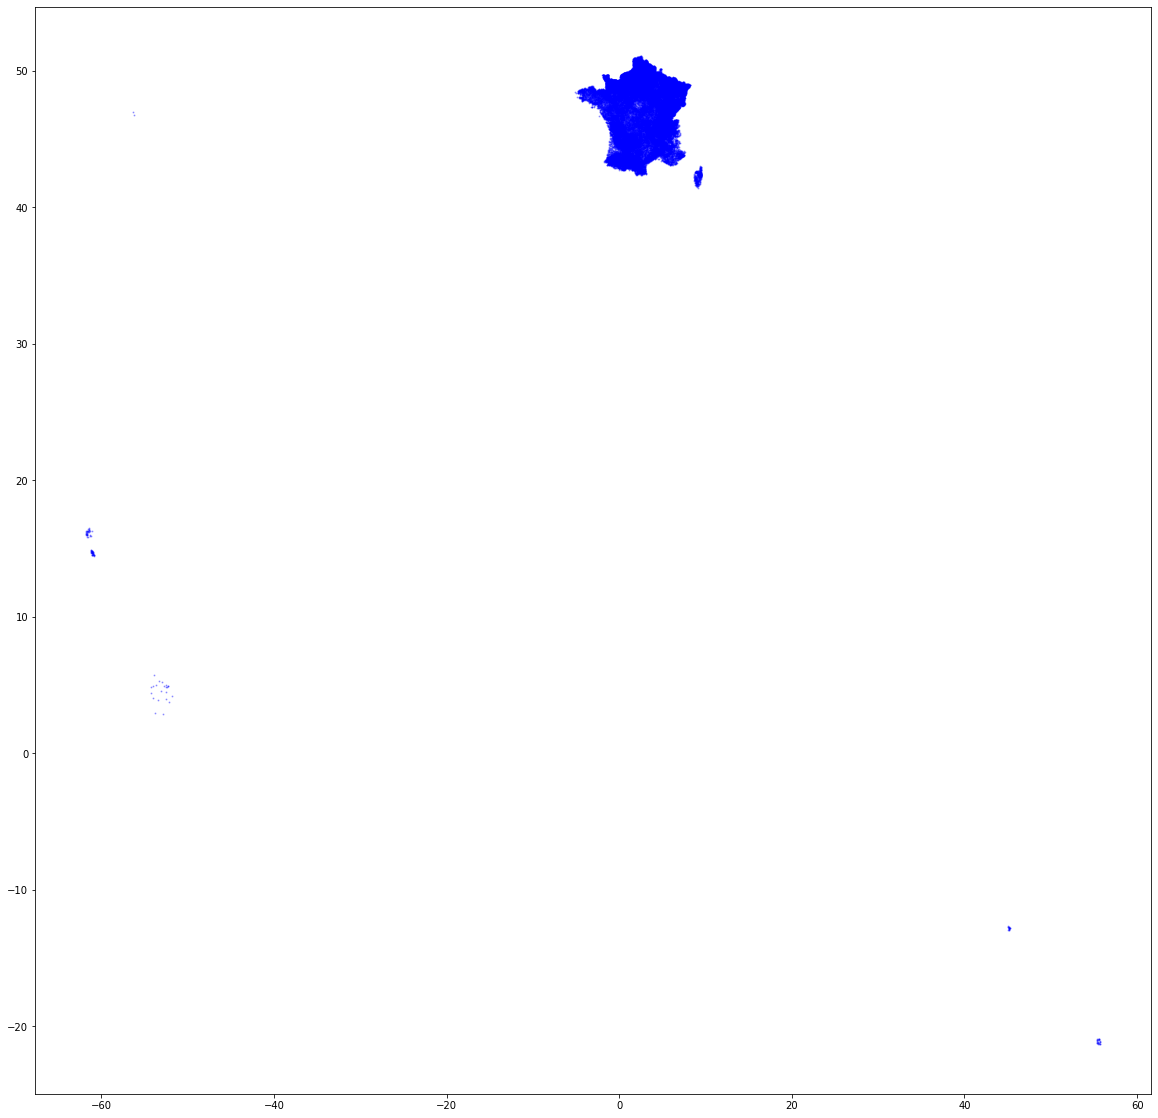

In [45]:
plt.figure(figsize=(20, 20))

plt.scatter(
    df['lat_centro'],
    df['lon_centro'],
    alpha=.3,
    c='b',
    s=1
)

plt.show()

### Vérifications des données de commune

In [81]:
df[df['code_dept'] == '35'].sort_values('population', ascending=False)

,insee,nom,wikipedia,surf_m2,lat_centro,lon_centro,statut,x_chf_lieu,y_chf_lieu,z_moyen,population,code_cant,code_arr,code_dept,nom_dept,code_reg,nom_region
552,35238,Rennes,fr:Rennes,50358620.0,-1.681846,48.111673,Préfecture de régi,3518.0,67896.0,38.0,206.6,98.0,3.0,35,ILLE-ET-VILAINE,53.0,BRETAGNE
23354,35288,Saint-Malo,fr:Saint-Malo,38080762.0,-1.981865,48.641013,Sous-préfecture,3312.0,68502.0,24.0,47.0,96.0,4.0,35,ILLE-ET-VILAINE,53.0,BRETAGNE
18103,35115,Fougères,fr:Fougères,10430716.0,-1.194393,48.352750,Sous-préfecture,3890.0,68139.0,109.0,19.8,97.0,1.0,35,ILLE-ET-VILAINE,53.0,BRETAGNE
10132,35360,Vitré,fr:Vitré (Ille-et-Vilaine),38700446.0,-1.193421,48.114117,Chef-lieu canton,3869.0,67886.0,99.0,16.7,99.0,1.0,35,ILLE-ET-VILAINE,53.0,BRETAGNE
10571,35047,Bruz,fr:Bruz,29952474.0,-1.748525,48.025942,Chef-lieu canton,3464.0,67799.0,29.0,16.2,47.0,3.0,35,ILLE-ET-VILAINE,53.0,BRETAGNE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24329,35261,Saint-Christophe-de-Valains,fr:Saint-Christophe-de-Valains,3289028.0,-1.451403,48.341366,Commune simple,3706.0,68139.0,74.0,0.2,35.0,1.0,35,ILLE-ET-VILAINE,53.0,BRETAGNE
24871,35325,La Selle-Guerchaise,fr:La Selle-Guerchaise,2178468.0,-1.170387,47.942790,Commune simple,3886.0,67686.0,80.0,0.2,15.0,1.0,35,ILLE-ET-VILAINE,53.0,BRETAGNE
651,35158,Le Lou-du-Lac,fr:Le Lou-du-Lac,3231550.0,-1.995212,48.201013,Commune simple,3293.0,68016.0,87.0,0.1,22.0,3.0,35,ILLE-ET-VILAINE,53.0,BRETAGNE
14098,35148,Lanrigan,fr:Lanrigan,4046871.0,-1.691937,48.391485,Commune simple,3523.0,68210.0,72.0,0.1,17.0,3.0,35,ILLE-ET-VILAINE,53.0,BRETAGNE
